Loading the Dataset

In [5]:
import pandas as pd

df = pd.read_csv("3) Sentiment dataset.csv")
df.head()


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


 Text Preprocessing

In [6]:
import re
import string
from nltk.corpus import stopwords

# Remove punctuation, lowercase text, and remove stopwords
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    return " ".join(words)

df['cleaned_text'] = df['Text'].astype(str).apply(clean_text)  
print(df['cleaned_text'] )

0                            enjoying beautiful day park
1                               traffic terrible morning
2                             finished amazing workout 💪
3                       excited upcoming weekend getaway
4                       trying new recipe dinner tonight
                             ...                        
727    collaborating science project received recogni...
728    attending surprise birthday party organized fr...
729    successfully fundraising school charity initia...
730    participating multicultural festival celebrati...
731    organizing virtual talent show challenging tim...
Name: cleaned_text, Length: 732, dtype: object


Check Columns & Missing Values:

In [7]:
# Check column names and missing values
print("Columns:", df.columns)
print("\nMissing Values:\n", df.isnull().sum())


Columns: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour', 'cleaned_text'],
      dtype='object')

Missing Values:
 Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
cleaned_text    0
dtype: int64


Text Cleaning Function:

In [8]:
# Define text cleaning function
def clean_text(text):
    text = str(text).lower()  # lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]  # remove stopwords
    return " ".join(words)

# Apply to Text column
df['cleaned_text'] = df['Text'].astype(str).apply(clean_text)
df[['Text', 'cleaned_text']].head()


,Text,cleaned_text
0,Enjoying a beautiful day at the park! ...,enjoying beautiful day park
1,Traffic was terrible this morning. ...,traffic terrible morning
2,Just finished an amazing workout! 💪 ...,finished amazing workout 💪
3,Excited about the upcoming weekend getaway! ...,excited upcoming weekend getaway
4,Trying out a new recipe for dinner tonight. ...,trying new recipe dinner tonight


Sentiment Scoring with TextBlob:

In [9]:
# Function to compute polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply polarity
df['polarity'] = df['cleaned_text'].apply(get_polarity)


Classify Sentiment Labels:

In [10]:
# Assign sentiment labels based on polarity score
def classify_sentiment(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment_label'] = df['polarity'].apply(classify_sentiment)
df[['cleaned_text', 'polarity', 'sentiment_label']].head()


,cleaned_text,polarity,sentiment_label
0,enjoying beautiful day park,0.675000,Positive
1,traffic terrible morning,-1.000000,Negative
2,finished amazing workout 💪,0.600000,Positive
3,excited upcoming weekend getaway,0.375000,Positive
4,trying new recipe dinner tonight,0.136364,Positive


Visualize Sentiment Distribution:

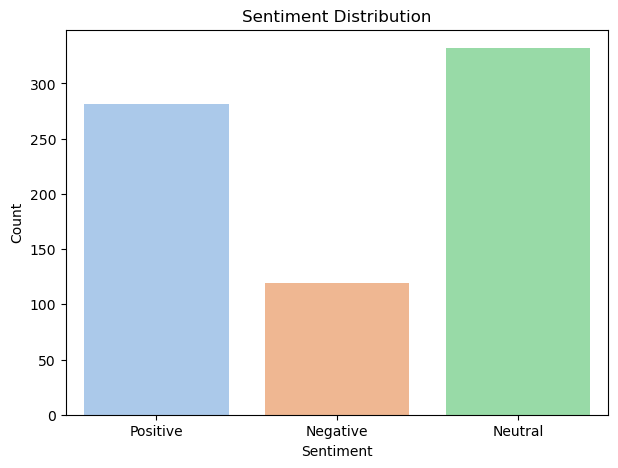

In [14]:
import seaborn as sns

# Countplot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='sentiment_label', hue='sentiment_label', palette='pastel', legend=False)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


Generate Word Clouds:

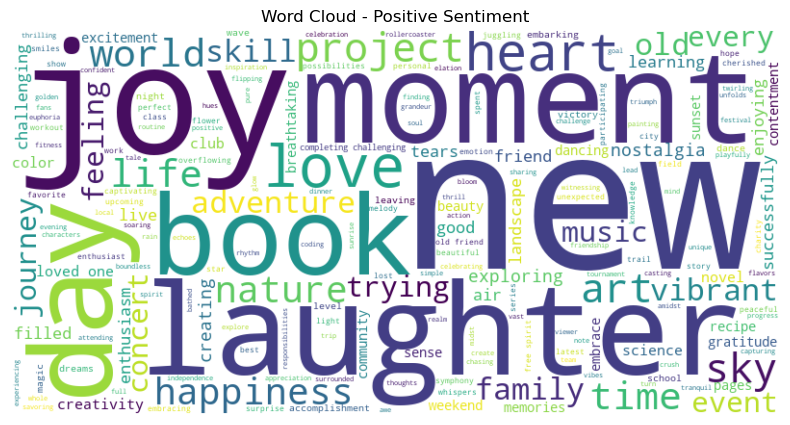

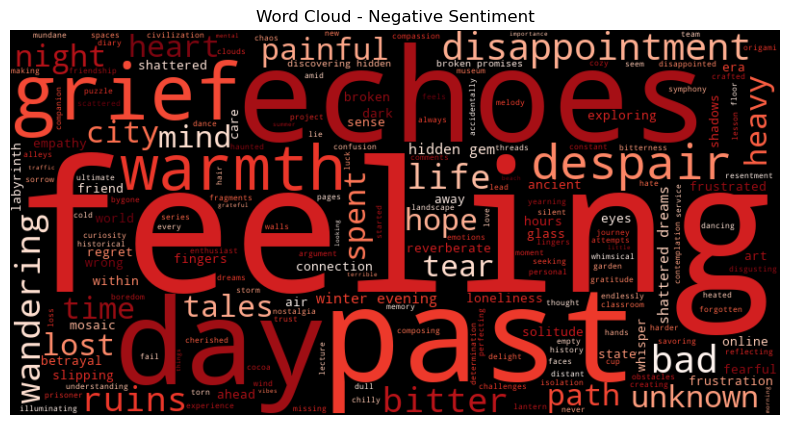

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine text
positive_text = " ".join(df[df['sentiment_label'] == 'Positive']['cleaned_text'])
negative_text = " ".join(df[df['sentiment_label'] == 'Negative']['cleaned_text'])

# Word Cloud - Positive
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Sentiment")
plt.show()

# Word Cloud - Negative
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Negative Sentiment")
plt.show()
